In [40]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset path
df = pd.read_csv('Downloads/hocco_sales_data_23 1.csv')

# Check the structure of your dataset
df.head()


,itemid,orderdate,qty,amount
0,SFG633,01-01-2022,9.0,270.09
1,6010101,01-01-2022,6.0,408.84
2,R00010,01-01-2022,40.0,2176.20
3,R00429,01-01-2022,21.0,1387.75
4,RMD0460,01-01-2022,15.0,486.00


In [42]:
# Count the frequency of each itemid
item_freq = df['itemid'].value_counts()

# Get the itemid with the maximum frequency
max_freq_itemid = item_freq.idxmax()

# Filter the dataframe for that itemid
filtered_df = df[df['itemid'] == max_freq_itemid]

print(item_freq)

# Display the filtered dataframe
filtered_df.head()


itemid
SFG648     701
R00513     700
SFG152     698
A00123     697
R00526     697
          ... 
SFG588       1
SFG374       1
SFG370       1
SFG373       1
RMD0651      1
Name: count, Length: 1112, dtype: int64


,itemid,orderdate,qty,amount
60,SFG648,01-01-2022,32.0,3264.0
188,SFG648,02-01-2022,36.0,3623.0
228,SFG648,03-01-2022,47.0,4769.5
437,SFG648,04-01-2022,16.0,1607.5
547,SFG648,05-01-2022,22.0,2244.0


In [48]:
# Ensure the orderdate is in datetime format
filtered_df['orderdate'] = pd.to_datetime(filtered_df['orderdate'], format='%d-%m-%Y')

# Create a date range from the start to the end of the year
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')

# Create a new DataFrame with all dates
daily_data = pd.DataFrame(date_range, columns=['orderdate'])

# Merge with the filtered data to ensure all dates are present
daily_data = daily_data.merge(filtered_df[['orderdate', 'amount']], on='orderdate', how='left')

# Fill NaN amounts with 0
daily_data['amount'] = daily_data['amount'].fillna(0)

# Add itemid column
daily_data['itemid'] = max_freq_itemid

# Display the daily data
print(daily_data)


     orderdate   amount  itemid
0   2022-01-01  3264.00  SFG648
1   2022-01-02  3623.00  SFG648
2   2022-01-03  4769.50  SFG648
3   2022-01-04  1607.50  SFG648
4   2022-01-05  2244.00  SFG648
..         ...      ...     ...
360 2022-12-27     0.00  SFG648
361 2022-12-28  2047.44  SFG648
362 2022-12-29  6896.64  SFG648
363 2022-12-30  1831.92  SFG648
364 2022-12-31  3340.56  SFG648

[365 rows x 3 columns]


C:\Users\Vishwa.Pujara\AppData\Local\Temp\ipykernel_13156\965339583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['orderdate'] = pd.to_datetime(filtered_df['orderdate'], format='%d-%m-%Y')


In [50]:
# Split the daily_data into train and test sets
train_data = daily_data[(daily_data['orderdate'] >= '2022-01-01') & (daily_data['orderdate'] <= '2022-11-30')]
test_data = daily_data[(daily_data['orderdate'] >= '2022-12-01') & (daily_data['orderdate'] <= '2022-12-31')]

# Display the sizes of the train and test sets
print(f"Train data size: {train_data.shape[0]}")
print(f"Test data size: {test_data.shape[0]}")


Train data size: 334
Test data size: 31


In [52]:
# Prepare the train data for Prophet
prophet_train_data = train_data.rename(columns={'orderdate': 'ds', 'amount': 'y'})

prophet_train_data.head()

,ds,y,itemid
0,2022-01-01,3264.0,SFG648
1,2022-01-02,3623.0,SFG648
2,2022-01-03,4769.5,SFG648
3,2022-01-04,1607.5,SFG648
4,2022-01-05,2244.0,SFG648


In [54]:
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_train_data)


10:39:05 - cmdstanpy - INFO - Chain [1] start processing
10:39:06 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# Create a DataFrame for future dates (31 days for December)
future_dates = model.make_future_dataframe(periods=31)

# Predict the future values
forecast = model.predict(future_dates)


In [58]:
# Filter the forecast to get predictions for December 2022
december_forecast = forecast[(forecast['ds'] >= '2022-12-01') & (forecast['ds'] <= '2022-12-31')]

# Display the predictions for December
print(december_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


            ds         yhat   yhat_lower   yhat_upper
334 2022-12-01  6136.542667  4322.598912  8183.387208
335 2022-12-02  2399.677351   325.648542  4391.673694
336 2022-12-03  2732.202690   762.933974  4574.781202
337 2022-12-04  1501.548000  -404.838972  3419.573222
338 2022-12-05  4674.167740  2668.032287  6680.470622
339 2022-12-06  1233.482934  -632.735658  3215.371386
340 2022-12-07  2312.013316   424.509800  4209.298322
341 2022-12-08  6140.533866  4260.386604  8126.977192
342 2022-12-09  2403.668550   456.344380  4260.706835
343 2022-12-10  2736.193889   826.806439  4690.607718
344 2022-12-11  1505.539199  -405.732348  3365.581757
345 2022-12-12  4678.158940  2752.534178  6608.497376
346 2022-12-13  1237.474133  -723.143447  3097.810778
347 2022-12-14  2316.004516   293.656695  4330.053453
348 2022-12-15  6144.525065  4145.246604  8137.814088
349 2022-12-16  2407.659749   566.245984  4472.334343
350 2022-12-17  2740.185088   824.427451  4650.877759
351 2022-12-18  1509.530398 

In [60]:
# Merge with the actual amounts for December 2022
comparison_df = december_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(
    test_data[['orderdate', 'amount']],
    left_on='ds',
    right_on='orderdate',
    how='left'
)

# Rename 'amount' to 'y'
comparison_df.rename(columns={'amount': 'y'}, inplace=True)

# Drop the 'orderdate' column
comparison_df.drop(columns=['orderdate'], inplace=True)

# Display the comparison DataFrame
print(comparison_df)


           ds         yhat   yhat_lower   yhat_upper        y
0  2022-12-01  6136.542667  4322.598912  8183.387208  4418.16
1  2022-12-02  2399.677351   325.648542  4391.673694  2694.00
2  2022-12-03  2732.202690   762.933974  4574.781202  1293.12
3  2022-12-04  1501.548000  -404.838972  3419.573222   538.80
4  2022-12-05  4674.167740  2668.032287  6680.470622  7004.40
5  2022-12-06  1233.482934  -632.735658  3215.371386     0.00
6  2022-12-07  2312.013316   424.509800  4209.298322  3663.84
7  2022-12-08  6140.533866  4260.386604  8126.977192  6573.36
8  2022-12-09  2403.668550   456.344380  4260.706835  1400.88
9  2022-12-10  2736.193889   826.806439  4690.607718  1185.36
10 2022-12-11  1505.539199  -405.732348  3365.581757  3340.56
11 2022-12-12  4678.158940  2752.534178  6608.497376  4525.92
12 2022-12-13  1237.474133  -723.143447  3097.810778  1077.60
13 2022-12-14  2316.004516   293.656695  4330.053453  1185.36
14 2022-12-15  6144.525065  4145.246604  8137.814088  5711.28
15 2022-

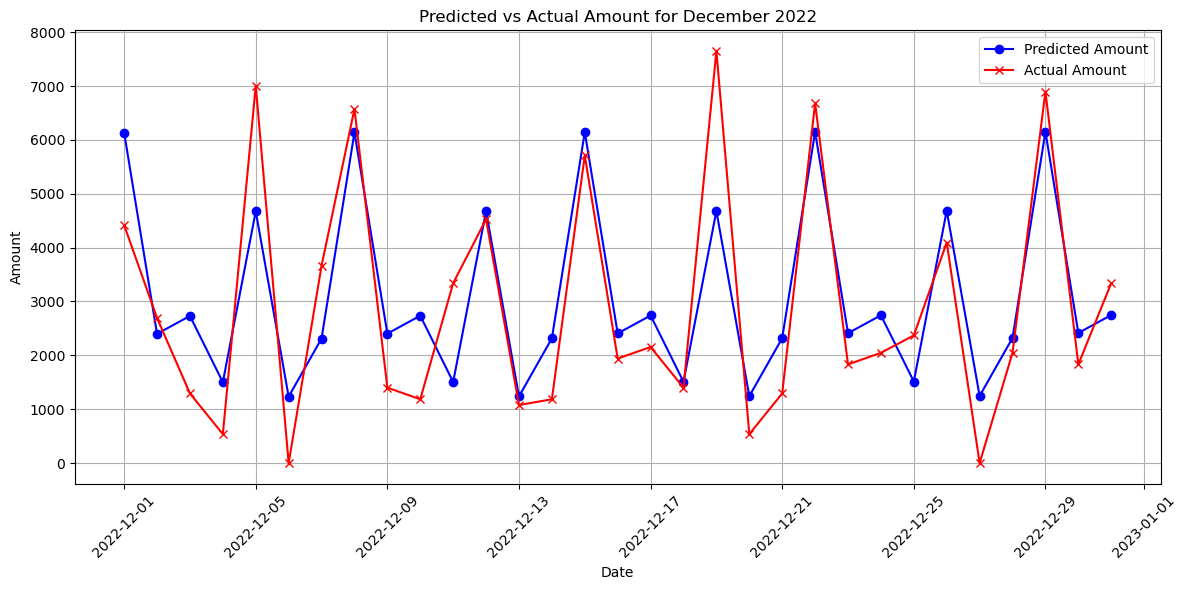

In [64]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot predicted values
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Predicted Amount', color='blue', marker='o')

# Plot actual values
plt.plot(comparison_df['ds'], comparison_df['y'], label='Actual Amount', color='red', marker='x')

# Fill between the forecast uncertainty
"""plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'], 
               color='blue', alpha=0.2, label='Confidence Interval')
"""
# Customize the plot
plt.title('Predicted vs Actual Amount for December 2022')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


## JANUARY FORECAST

In [67]:
# Filter data for the same itemid from January 2022 to December 2022
jan_data = daily_data[(daily_data['itemid'] == max_freq_itemid) & 
                         (daily_data['orderdate'] >= '2022-01-01') & 
                         (daily_data['orderdate'] <= '2022-12-31')]

# Prepare the data for Prophet
prophet_jan_data = jan_data.rename(columns={'orderdate': 'ds', 'amount': 'y'})

print(prophet_jan_data)    

            ds        y  itemid
0   2022-01-01  3264.00  SFG648
1   2022-01-02  3623.00  SFG648
2   2022-01-03  4769.50  SFG648
3   2022-01-04  1607.50  SFG648
4   2022-01-05  2244.00  SFG648
..         ...      ...     ...
360 2022-12-27     0.00  SFG648
361 2022-12-28  2047.44  SFG648
362 2022-12-29  6896.64  SFG648
363 2022-12-30  1831.92  SFG648
364 2022-12-31  3340.56  SFG648

[365 rows x 3 columns]


In [69]:
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_jan_data)


10:39:28 - cmdstanpy - INFO - Chain [1] start processing
10:39:28 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
# Create a DataFrame for future dates (31 days for January 2023)
future_dates = model.make_future_dataframe(periods=31, freq='D')

# Predict the future values
forecast = model.predict(future_dates)

future_dates.tail()

,ds
391,2023-01-27
392,2023-01-28
393,2023-01-29
394,2023-01-30
395,2023-01-31


In [73]:
# Filter the forecast to get predictions for January 2023
january_forecast = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-01-31')]

# Display the predictions for January
print(january_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


            ds         yhat   yhat_lower   yhat_upper
365 2023-01-01  1518.018207  -259.170968  3453.774829
366 2023-01-02  4752.145803  2756.073742  6593.160380
367 2023-01-03  1153.915476  -766.279685  2923.039671
368 2023-01-04  2277.643643   271.770529  4222.643421
369 2023-01-05  6124.765887  4302.930637  7928.622920
370 2023-01-06  2345.342701   317.986971  4211.759266
371 2023-01-07  2653.496389   670.307901  4523.338126
372 2023-01-08  1520.984138  -400.112479  3491.067260
373 2023-01-09  4755.111734  2782.467463  6531.459077
374 2023-01-10  1156.881407  -781.631035  3038.631705
375 2023-01-11  2280.609574   410.616991  4253.849419
376 2023-01-12  6127.731818  4284.550825  8008.192161
377 2023-01-13  2348.308632   374.939760  4445.833117
378 2023-01-14  2656.462320   770.365718  4540.589751
379 2023-01-15  1523.950069  -382.083218  3326.551809
380 2023-01-16  4758.077665  2724.383814  6523.176444
381 2023-01-17  1159.847338  -807.040985  2946.626362
382 2023-01-18  2283.575505 

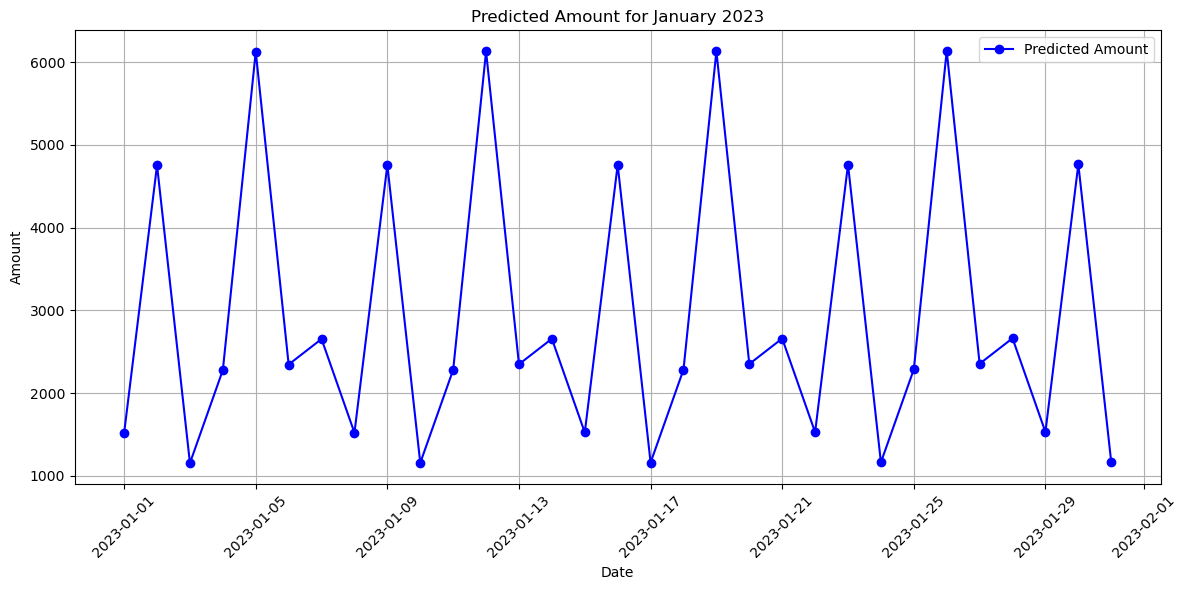

In [77]:
# Plotting the January 2023 predictions
plt.figure(figsize=(12, 6))

# Plot predicted values
plt.plot(january_forecast['ds'], january_forecast['yhat'], label='Predicted Amount', color='blue', marker='o')

# Fill between the forecast uncertainty
"""plt.fill_between(january_forecast['ds'], january_forecast['yhat_lower'], january_forecast['yhat_upper'], 
                 color='blue', alpha=0.2, label='Confidence Interval')
"""
# Customize the plot
plt.title('Predicted Amount for January 2023')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [78]:
# Create a DataFrame for the historical data
historical_data = daily_data[daily_data['itemid'] == max_freq_itemid]

# Combine the historical data with the January 2023 predictions
combined_data2 = pd.concat([historical_data[['orderdate', 'amount']], 
                            january_forecast[['ds', 'yhat']].rename(columns={'ds': 'orderdate', 'yhat': 'amount'})])

# Rename columns for consistency
combined_data2['itemid'] = max_freq_itemid
combined_data2['amount'] = combined_data2['amount'].fillna(0)  # Fill NaN values with 0 for plotting

# Sort by date
combined_data2 = combined_data.sort_values('orderdate')


NameError: name 'combined_data' is not defined

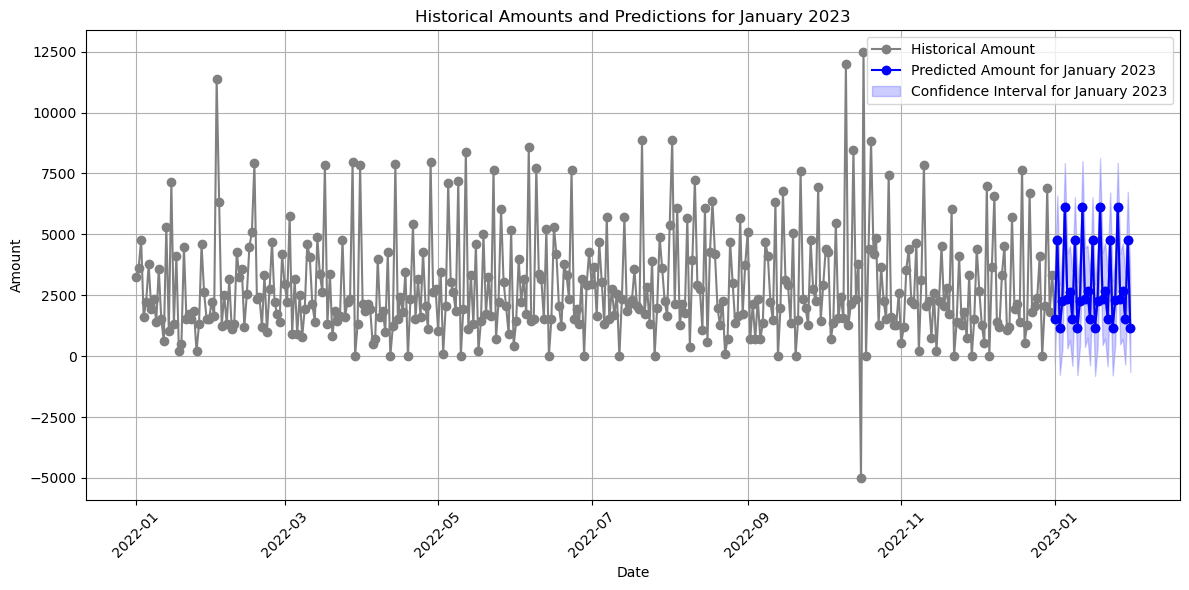

In [80]:
# Plotting the historical data and January 2023 predictions
plt.figure(figsize=(12, 6))

# Plot historical amounts
plt.plot(combined_data2['orderdate'], combined_data2['amount'], label='Historical Amount', color='gray', marker='o')

# Plot predicted values for January 2023
plt.plot(january_forecast['ds'], january_forecast['yhat'], label='Predicted Amount for January 2023', color='blue', marker='o')

# Fill between the forecast uncertainty for January 2023
plt.fill_between(january_forecast['ds'], january_forecast['yhat_lower'], january_forecast['yhat_upper'], 
                 color='blue', alpha=0.2, label='Confidence Interval for January 2023')

# Customize the plot
plt.title('Historical Amounts and Predictions for January 2023')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
